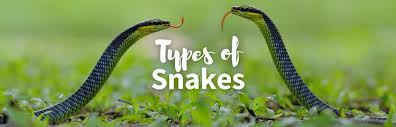

#***Identify the snake breed***

**Problem statement**

The government has been facing a long-standing issue of wild animals entering residential areas due to various reasons. It's of critical importance that if any such dangerous animal is encountered, the concerned authority should be notified immediately. Reptiles, especially snakes, are among the most dangerous animals and they often enter residential areas.

Recently due to an incident of a youngster getting bitten by a snake, the government decided to install cameras at every corner of the road to detect snakes and other animals.

You have been hired as a Deep Learning engineer to create a sophisticated model that can detect the breed of a snake from its image.

**Data description**
This data set consists of the following two columns:

Column Name Description

image_id : Name of the image file
breed : Snake breed [35 different breeds]

**The data folder consists of two folders and two .csv files. The details are as**follows:


train: Contains 5508 images for 35 classes

test: Contains 2361 images

train.csv: 5508 x 2

test.csv: 2361 x 1

## **Used In This Project**
Keras

TensorFlow

Image Classification

Deep Learning



##**Improt Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import tensorflow as tf
import keras;
from keras_preprocessing import image;
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam;
from keras.callbacks import ModelCheckpoint;
from keras.models import Sequential;
#from tensorflow.keras.applications import VGG16;cc
from tensorflow.keras.applications import InceptionResNetV2;
from keras.applications.vgg16 import preprocess_input;
from tensorflow.keras.applications.vgg16 import decode_predictions;
from tensorflow.keras.callbacks import EarlyStopping;


### **Load train and test csv file for image class**

In [3]:
# Load Train Data

Train_DF = pd.read_csv("train.csv")
Train_DF.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [4]:
# Load Test Data

Test_DF = pd.read_csv("test.csv")
Test_DF.head()

,image_id
0,7ede553357
1,3500b219e4
2,d43a78d6d9
3,1f36f26994
4,8cb85fc58e


##**Data preprocessing & Analysis**

In [ ]:
Train_DF.info()

##**How many types of breeds are there?**

In [5]:
classif = Train_DF['breed'].unique()
classif

array(['nerodia-erythrogaster', 'pantherophis-vulpinus',
       'thamnophis-sirtalis', 'pantherophis-obsoletus',
       'agkistrodon-contortrix', 'crotalus-atrox',
       'lampropeltis-triangulum', 'crotalus-horridus', 'crotalus-ruber',
       'heterodon-platirhinos', 'nerodia-sipedon', 'thamnophis-elegans',
       'thamnophis-marcianus', 'crotalus-viridis', 'nerodia-fasciata',
       'haldea-striatula', 'storeria-dekayi', 'agkistrodon-piscivorus',
       'nerodia-rhombifer', 'storeria-occipitomaculata',
       'thamnophis-radix', 'coluber-constrictor', 'natrix-natrix',
       'diadophis-punctatus', 'masticophis-flagellum',
       'pantherophis-spiloides', 'rhinocheilus-lecontei',
       'lampropeltis-californiae', 'pituophis-catenifer',
       'opheodrys-aestivus', 'pantherophis-guttatus',
       'pantherophis-alleghaniensis', 'thamnophis-proximus',
       'pantherophis-emoryi', 'crotalus-scutulatus'], dtype=object)

In [6]:
Train_DF['breed'].value_counts()

thamnophis-sirtalis            509
storeria-dekayi                412
pantherophis-obsoletus         366
crotalus-atrox                 354
pituophis-catenifer            298
nerodia-sipedon                259
agkistrodon-contortrix         206
lampropeltis-triangulum        197
diadophis-punctatus            184
pantherophis-alleghaniensis    172
nerodia-erythrogaster          171
lampropeltis-californiae       166
opheodrys-aestivus             152
agkistrodon-piscivorus         147
crotalus-horridus              142
coluber-constrictor            129
heterodon-platirhinos          118
thamnophis-proximus            112
nerodia-rhombifer              104
thamnophis-radix               100
pantherophis-guttatus          100
haldea-striatula                98
pantherophis-spiloides          92
rhinocheilus-lecontei           91
storeria-occipitomaculata       87
masticophis-flagellum           83
crotalus-viridis                83
thamnophis-marcianus            82
crotalus-ruber      

###**Plot the all breed type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


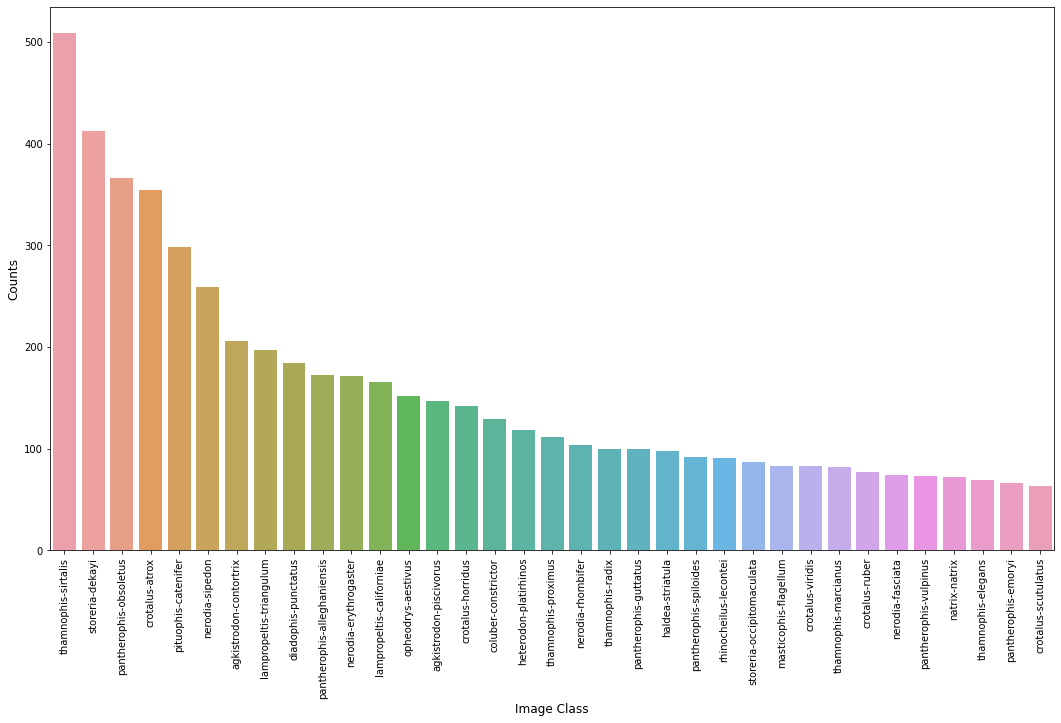

In [7]:
label_counts = Train_DF.breed.value_counts()
plt.figure(figsize = (18,10))
sb.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Class', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

##**Features Seleaction**
Seleact Required Features form data_Sets to build a model that can predict Snake Breed



##**X Independent Variable**

We have images in train folder. And, we have name of those breeds in the csv format. We have to merge between these two to make the machine understand which image belongs to which breed.

Lets run a simple for loop

In [8]:
import tensorflow as tf
import keras;
import os;
from os import listdir;
from PIL import Image as PImage;
import cv2
from tqdm import tqdm

In [11]:
img_width = 150;
img_height = 150;
x=[];

for i in tqdm (range(Train_DF.shape[0])):
    path = 'drive/MyDrive/train/' + Train_DF['image_id'][i] + '.jpg'
    img = image.load_img(path, target_size = (img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    x.append(img)
    
#x = np.array(x);
#rm path

100%|██████████| 5508/5508 [00:18<00:00, 297.91it/s]


Nice, the images are extracted. We have got our x. Now we need y

##**Traget Variable is y**

In [12]:
 y = Train_DF.drop(columns = ['image_id'], axis = 1)
 

In [13]:
y = pd.get_dummies(y)
y

,breed_agkistrodon-contortrix,breed_agkistrodon-piscivorus,breed_coluber-constrictor,breed_crotalus-atrox,breed_crotalus-horridus,breed_crotalus-ruber,breed_crotalus-scutulatus,breed_crotalus-viridis,breed_diadophis-punctatus,breed_haldea-striatula,...,breed_pantherophis-vulpinus,breed_pituophis-catenifer,breed_rhinocheilus-lecontei,breed_storeria-dekayi,breed_storeria-occipitomaculata,breed_thamnophis-elegans,breed_thamnophis-marcianus,breed_thamnophis-proximus,breed_thamnophis-radix,breed_thamnophis-sirtalis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5506,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
y.shape

(5508, 35)

###Nice. So, we have converted our y file into numpy array. But how about x? Shouldn't it be a numpy array also?

In [15]:
x = np.array(x)

##**Splitting Data into train and test**

In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=0)

In [17]:
y_train.shape

(4406, 35)

##**Deep Leraning Model**

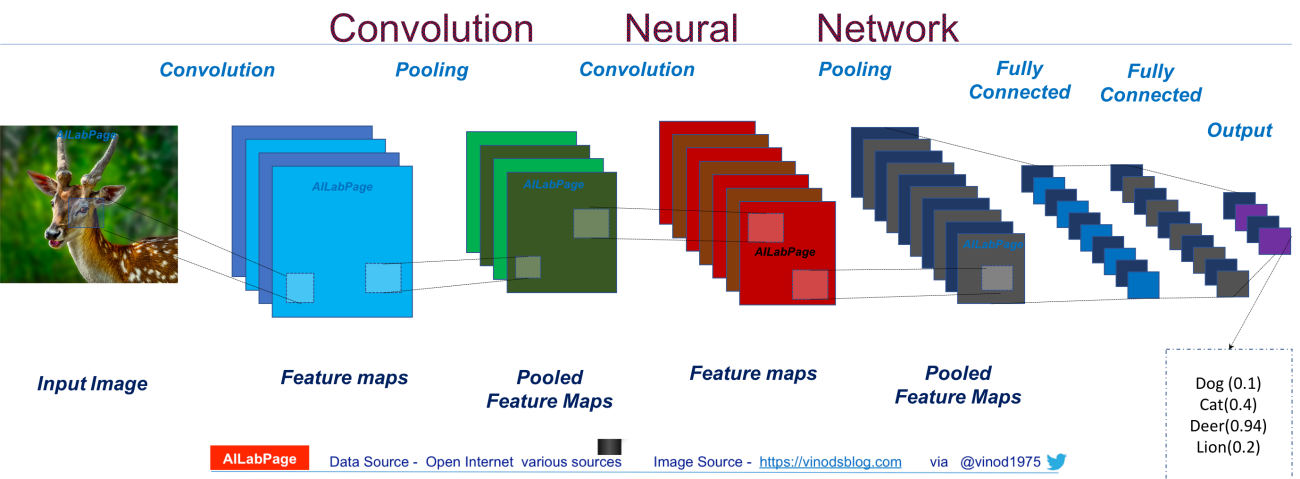

##**Feature extraction**
Convolution is one of the main building blocks of a CNN. The term convolution refers to the mathematical combination of two functions to produce a third function. It merges two sets of information.

In the case of a CNN, the convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

We execute a convolution by sliding the filter over the input. At every location, a matrix multiplication is performed and sums the result onto the feature map.

In the animation below, you can see the convolution operation. You can see the filter (the green square) is sliding over our input (the blue square) and the sum of the convolution goes into the feature map (the red square).

The area of our filter is also called the receptive field, named after the neuron cells! The size of this filter is 3x3.



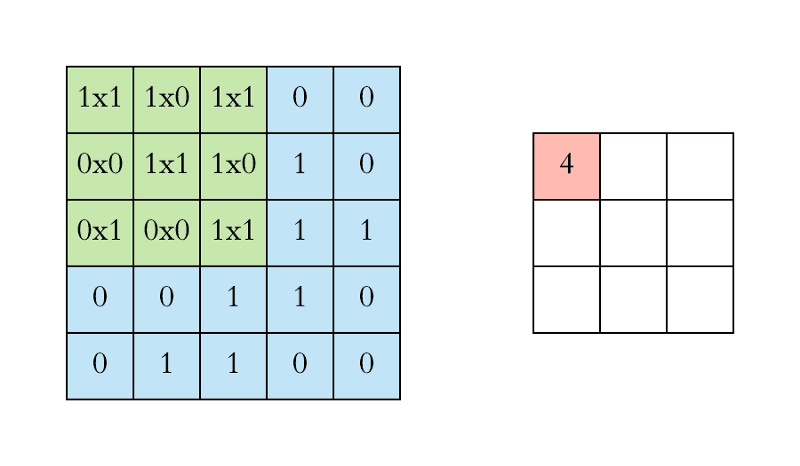

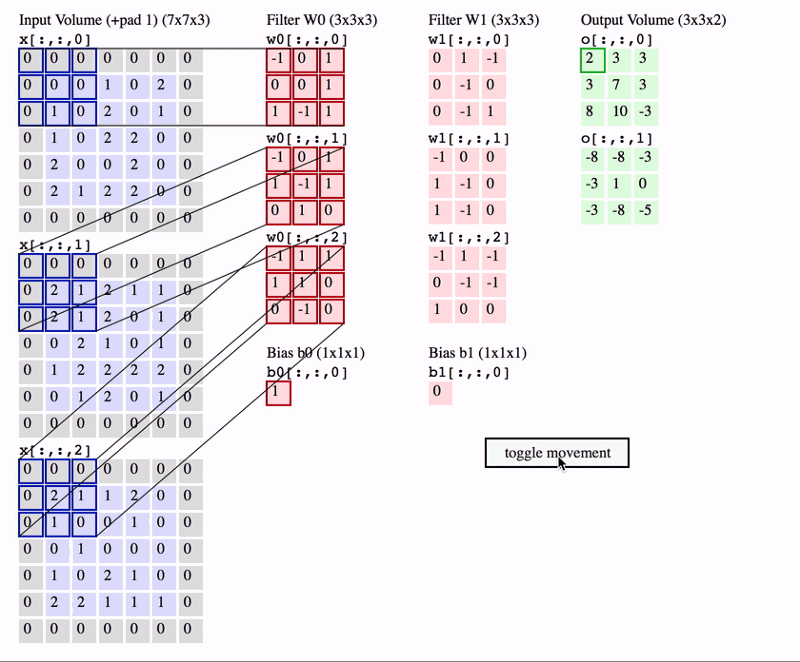

## **Build the CNN Model**

In [18]:
mod = keras.models.Sequential([
                        keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = X_train[0].shape),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.30),
    
                        keras.layers.Conv2D(16, (3,3), activation = 'relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.30),
    
                        keras.layers.Conv2D(16, (3,3), activation = 'relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.40),
    
                        keras.layers.Conv2D(16, (3,3), activation = 'relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Dropout(0.50),
    
                        keras.layers.Flatten(),
     
                        keras.layers.Dense(units = 128, activation = 'relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.Dropout(0.50),
    
                        keras.layers.Dense(units = 128, activation = 'relu'),
                        keras.layers.BatchNormalization(),
                        keras.layers.Dropout(0.50),
    
    
                        keras.layers.Dense(units = 35, activation = 'softmax')
])
                        

##**Compile Model**

In [19]:
mod.compile(optimizer= 'Adam' , loss = 'categorical_crossentropy' , metrics= ['accuracy'])

##**Train Model Using X_train and y_train Datasets**

In [20]:
mod.fit(X_train, y_train, epochs=2, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/2
69/69 [==============================] - 137s 2s/step - loss: 4.6418 - accuracy: 0.0361 - val_loss: 3.6481 - val_accuracy: 0.0617
Epoch 2/2
69/69 [==============================] - 136s 2s/step - loss: 4.2799 - accuracy: 0.0420 - val_loss: 3.8665 - val_accuracy: 0.0617


##**Prediction**

In [39]:
import numpy as np  
from keras.preprocessing import image  
test_image = image.load_img('/content/a790d70cd3.jpg', target_size = (150, 150))  
test_image = image.img_to_array(test_image)  
test_image = np.expand_dims(test_image, axis = 0)  
Prediction = mod.predict(test_image)  
Prediction

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.2757136e-32, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.1807440e-38, 8.2247780e-06,
        1.0915109e-28, 0.0000000e+00, 1.6540652e-19, 0.0000000e+00,
        9.9999177e-01, 2.8436577e-26, 2.1495799e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.4844353e-37, 0.0000000e+00,
        1.4903754e-38, 4.6868025e-28, 0.0000000e+00, 1.9243124e-27,
        7.9810790e-26, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.6787528e-23, 0.0000000e+00, 1.2600683e-08]], dtype=float32)

##**Sort the Prediction from least to Greatest**

In [40]:
list_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]
x = Prediction 

for i in range(35):
  for j in range(35):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
# Shoe the sorted Label in  order
print(list_index)

[16, 11, 34, 14, 32, 28, 17, 27, 25, 12, 18, 4, 22, 10, 24, 15, 5, 6, 7, 19, 20, 21, 8, 23, 9, 1, 26, 2, 3, 29, 30, 31, 13, 33, 0, 35]


In [41]:
# Print the first 5 Breed
for i in range(5):
  print(classif[list_index[i]],':' ,round(Prediction[0][list_index[i]] * 100,2),'%')

storeria-dekayi : 100.0 %
thamnophis-elegans : 0.0 %
crotalus-scutulatus : 0.0 %
nerodia-fasciata : 0.0 %
thamnophis-proximus : 0.0 %


##**Evaluation metric**



In [ ]:
y_pred = mod.predict(X_test)

y_pred

In [31]:
from sklearn.metrics import r2_score , mean_squared_error
r2 = mean_squared_error(y_pred,y_test)
r2

0.028705457

##====================== **Model end** =================================

## **Test Data Prediction**

##**Test Data**

In [10]:
img_width = 150;
img_height = 150;
z=[];

for i in tqdm (range(Test_DF.shape[0])):
    pathe = 'drive/MyDrive/test/' + Test_DF['image_id'][i] + '.jpg'
    img1 = image.load_img(pathe, target_size = (img_width, img_height, 3))
    img1 = image.img_to_array(img1)
    img1 = img1/255.0
    #img1 = img1.reshape(1,img_width, img_height, 3 )
    z.append(img1)

100%|██████████| 2361/2361 [11:18<00:00,  3.48it/s]


In [ ]:
z

Let's convert it into a numpy array

In [27]:
z = np.array(z)

In [ ]:
z

## **Pridiction**

In [33]:
res = mod.predict(X_test)

In [34]:
res = np.array(res)

## **Getting the Submission File Ready**

In [35]:
cl = Train_DF['breed'].unique()

In [36]:
c = res.argmax(axis = 1);
c.shape

(1102,)

In [37]:
ped = [cl [index] for index in c];
hehe = pd.DataFrame({'breed': ped})

In [38]:
hehe.set_index('breed').to_csv('submissionnew.csv')